In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
data = gpd.read_file('../data/18septiembre/18septiembre.shp')
data.fecha = data.fecha.map(lambda x: datetime.strptime(x.split('.')[0], '%Y-%m-%d %H:%M:%S'))
data = data.loc[data.fecha.map(lambda x:x.day==20),
                ['BARRIO','COMUNA','NRO_EST','bicisDispo','posiciones','totales','fecha','geometry']]
data['fechaCorta']=[i.strftime('%H:%M') for i in data.fecha]
data.posiciones.replace(0.,1.,inplace=True)
data.head()

,BARRIO,COMUNA,NRO_EST,bicisDispo,posiciones,totales,fecha,geometry,fechaCorta
4,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:07:54,POINT (-58.39185516097447 -34.58358035902182),00:07
5,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:23:51,POINT (-58.39185516097447 -34.58358035902182),00:23
6,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:39:39,POINT (-58.39185516097447 -34.58358035902182),00:39
7,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 00:55:29,POINT (-58.39185516097447 -34.58358035902182),00:55
8,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 01:11:16,POINT (-58.39185516097447 -34.58358035902182),01:11


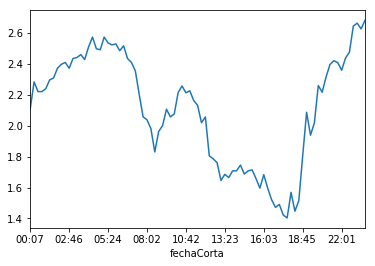

In [3]:
data.groupby(by='fechaCorta').mean()['bicisDispo'].plot()

In [6]:
data.totales.describe()

count    13909.00000
mean        19.81494
std          4.03650
min          8.00000
25%         19.00000
50%         20.00000
75%         20.00000
max         28.00000
Name: totales, dtype: float64

In [7]:
data['disponibilidad'] = data.bicisDispo / data.totales 
data['disponibilidad'][data['disponibilidad']>1] = 1


/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
data.disponibilidad.describe()

count    13909.000000
mean         0.117747
std          0.204758
min          0.000000
25%          0.000000
50%          0.050000
75%          0.142857
max          1.000000
Name: disponibilidad, dtype: float64

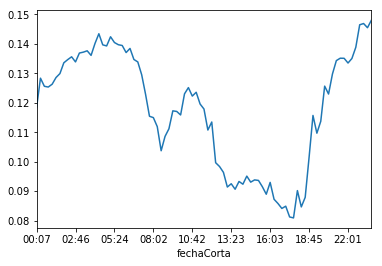

In [9]:
data.groupby(by='fechaCorta').mean()['disponibilidad'].plot()

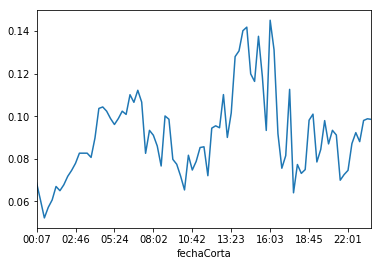

In [11]:
data[data.BARRIO=='RECOLETA'].groupby(by='fechaCorta').mean()['disponibilidad'].plot()

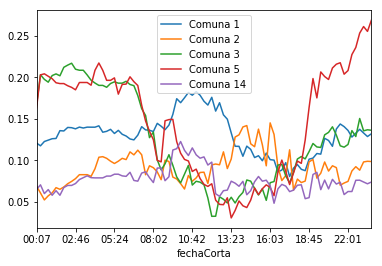

In [12]:
data[data.COMUNA==1].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 1')
data[data.COMUNA==2].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 2')
data[data.COMUNA==3].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 3')
data[data.COMUNA==5].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 5')
data[data.COMUNA==14].groupby(by='fechaCorta').mean()['disponibilidad'].plot(label='Comuna 14')
plt.legend()

In [14]:
data.fecha = data.fecha.map(str)

In [15]:
data.to_file('../data/20septiembre')

In [16]:
data.head()

,BARRIO,COMUNA,NRO_EST,bicisDispo,posiciones,totales,fecha,geometry,fechaCorta,disponibilidad
4,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:07:54,POINT (-58.39185516097447 -34.58358035902182),00:07,0.1250
5,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:23:51,POINT (-58.39185516097447 -34.58358035902182),00:23,0.1250
6,RECOLETA,2.0,01,2.0,16.0,16.0,2017-09-20 00:39:39,POINT (-58.39185516097447 -34.58358035902182),00:39,0.1250
7,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 00:55:29,POINT (-58.39185516097447 -34.58358035902182),00:55,0.1875
8,RECOLETA,2.0,01,3.0,15.0,16.0,2017-09-20 01:11:16,POINT (-58.39185516097447 -34.58358035902182),01:11,0.1875
